In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from ann_utils import *

%matplotlib inline

In [2]:
# Load a dataset
dataset_train = h5py.File('datasets/train_set.h5', mode='r')
train_set_x = np.array(dataset_train['train_set_x'][:])
train_set_y = np.array(dataset_train['train_set_y'][:])

dataset_test = h5py.File('datasets/test_set.h5', mode='r')
test_set_x = np.array(dataset_test['test_set_x'][:])
test_set_y = np.array(dataset_test['test_set_y'][:])

classes = np.array(dataset_test['list_classes'][:])

y_train = train_set_y.reshape((1, train_set_y.shape[0]))
y_test = test_set_y.reshape((1, test_set_y.shape[0]))

In [3]:
# Flatten the pixels and reshape into unrowed pixels by m-number of examples

train_set_x_unrowed = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x_unrowed = test_set_x.reshape(test_set_x.shape[0], -1).T

In [4]:
# Standardize the data set
X_train = train_set_x_unrowed / 255
X_test = test_set_x_unrowed / 255

In [5]:
def multilayer_nn_model(X_train, y_train, layers_dims, num_iterations=2000, learning_rate=0.01, initializer='random', print_cost=False):
    np.random.seed(1)
    costs = []
    
    print('Using ' + initializer + ' initialization')
    parameters = initialize_parameters(layers_dims, initializer)
    
    for i in range(0, num_iterations):
        A_output, caches = forward_propagate(X_train, parameters)
        
        cost = compute_cost(A_output, y_train)
        gradients = backward_propagate(A_output, y_train, caches)
        
        parameters = optimize_parameters(parameters, gradients, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate: " + str(learning_rate))
    plt.show()
    
    return parameters

In [6]:
# Neural network layers
# X -> 20 hidden layers -> 10 hidden layers -> 5 hidden layers -> 1 output layer
layers_dims = [X_train.shape[0], 20, 10, 5, 1]

Using he initialization
Cost after iteration 0: 0.712341
Cost after iteration 100: 0.530092
Cost after iteration 200: 0.426089
Cost after iteration 300: 0.403825
Cost after iteration 400: 0.280141
Cost after iteration 500: 0.217392
Cost after iteration 600: 0.096120
Cost after iteration 700: 0.063762
Cost after iteration 800: 0.037949
Cost after iteration 900: 0.024505
Cost after iteration 1000: 0.017428
Cost after iteration 1100: 0.013194
Cost after iteration 1200: 0.010456
Cost after iteration 1300: 0.008576
Cost after iteration 1400: 0.007154
Cost after iteration 1500: 0.006116
Cost after iteration 1600: 0.005285
Cost after iteration 1700: 0.004636
Cost after iteration 1800: 0.004112
Cost after iteration 1900: 0.003683
Cost after iteration 2000: 0.003332
Cost after iteration 2100: 0.003026
Cost after iteration 2200: 0.002766
Cost after iteration 2300: 0.002544
Cost after iteration 2400: 0.002352


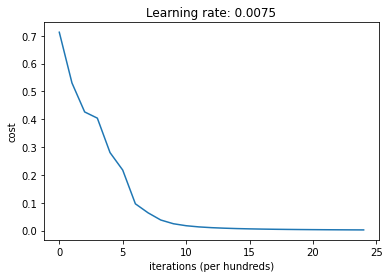

Training accuracy using He initialization: 0.9999999999999998
Test accuracy using He initialization: 0.8200000000000001


In [7]:
parameters_he = multilayer_nn_model(X_train, y_train, layers_dims, num_iterations=2500, learning_rate=0.0075, initializer='he', print_cost=True)

prob = predict(X_train, y_train, parameters_he)
print("Training accuracy using He initialization: "  + str(np.sum((prob == y_train) / X_train.shape[1])))
prob = predict(X_test, y_test, parameters_he)
print("Test accuracy using He initialization: "  + str(np.sum((prob == y_test) / X_test.shape[1])))

Using xavier initialization
Cost after iteration 0: 0.697426
Cost after iteration 100: 0.614828
Cost after iteration 200: 0.532019
Cost after iteration 300: 0.498791
Cost after iteration 400: 0.470021
Cost after iteration 500: 0.427117
Cost after iteration 600: 0.384549
Cost after iteration 700: 0.330469
Cost after iteration 800: 0.272653
Cost after iteration 900: 0.112231
Cost after iteration 1000: 0.077831
Cost after iteration 1100: 0.047668
Cost after iteration 1200: 0.032490
Cost after iteration 1300: 0.023533
Cost after iteration 1400: 0.017848
Cost after iteration 1500: 0.014039
Cost after iteration 1600: 0.011346
Cost after iteration 1700: 0.009384
Cost after iteration 1800: 0.007913
Cost after iteration 1900: 0.006794
Cost after iteration 2000: 0.005908
Cost after iteration 2100: 0.005200
Cost after iteration 2200: 0.004623
Cost after iteration 2300: 0.004148
Cost after iteration 2400: 0.003748


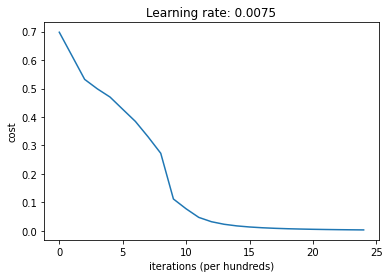

Training accuracy using Xavier initialization: 0.9999999999999998
Test accuracy using Xavier initialization: 0.76


In [8]:
parameters_xavier = multilayer_nn_model(X_train, y_train, layers_dims, num_iterations=2500, learning_rate=0.0075, initializer='xavier', print_cost=True)

prob = predict(X_train, y_train, parameters_xavier)
print("Training accuracy using Xavier initialization: "  + str(np.sum((prob == y_train) / X_train.shape[1])))
prob = predict(X_test, y_test, parameters_xavier)
print("Test accuracy using Xavier initialization: "  + str(np.sum((prob == y_test) / X_test.shape[1])))

Using random initialization
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.678011
Cost after iteration 200: 0.667600
Cost after iteration 300: 0.660422
Cost after iteration 400: 0.655458
Cost after iteration 500: 0.652014
Cost after iteration 600: 0.649616
Cost after iteration 700: 0.647942
Cost after iteration 800: 0.646770
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645368
Cost after iteration 1100: 0.644961
Cost after iteration 1200: 0.644673
Cost after iteration 1300: 0.644469
Cost after iteration 1400: 0.644325
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644100
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985


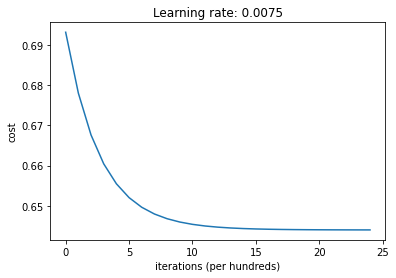

Training accuracy using random initialization: 0.6555023923444976
Test accuracy using random initialization: 0.3400000000000001


In [9]:
parameters_random = multilayer_nn_model(X_train, y_train, layers_dims, num_iterations=2500, learning_rate=0.0075, initializer='random', print_cost=True)

prob = predict(X_train, y_train, parameters_random)
print("Training accuracy using random initialization: "  + str(np.sum((prob == y_train) / X_train.shape[1])))
prob = predict(X_test, y_test, parameters_random)
print("Test accuracy using random initialization: "  + str(np.sum((prob == y_test) / X_test.shape[1])))